# Speed testing

In [3]:
import sys
sys.path.insert(0, '../../src')

import json
import random
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
from collections import defaultdict

from farkle.logic import gameobjects as go

Baseline `dh.possible_scores()` time. 

1000 sims: 
0.01293 sec avg
0.00131, 0.18565, min, max


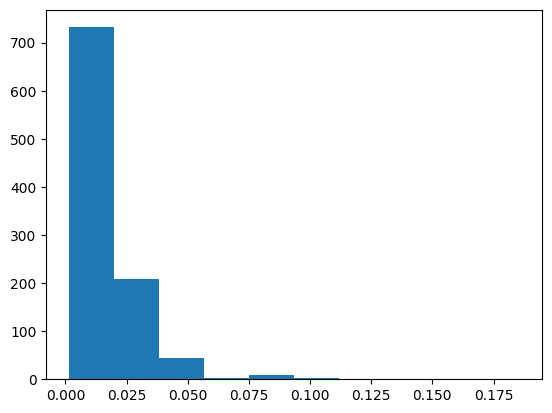

In [2]:
t_list = []
dh = go.DiceHand()
num_sims = 1000

for i in range(num_sims):
    dh.roll()
    t0 = perf_counter()
    dh.possible_scores()
    t1 = perf_counter()
    t_list.append(t1-t0)
    
mean_t = sum(t_list) / num_sims
max_t = max(t_list)
min_t = min(t_list)

print(f'{num_sims} sims: ')
print(f'{round(mean_t, 5)} sec avg')
print(f'{round(min_t, 5)}, {round(max_t, 5)}, min, max')
plt.hist(t_list)
plt.show()

Baseline `DiceHand.roll()` time. 

1000 sims: 
7.5e-06 sec avg
6.3e-06, 0.0003863, min, max


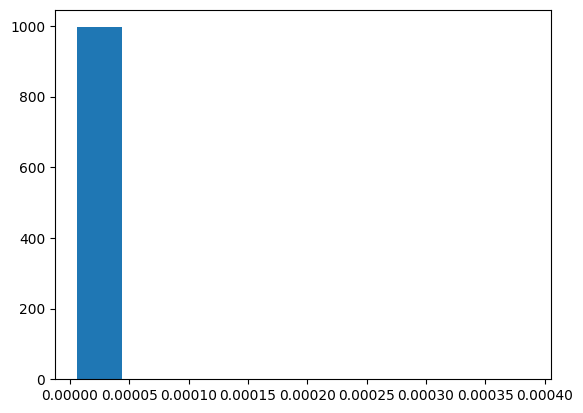

In [29]:
t_list = []
dh = go.DiceHand()
num_sims = 1000

for i in range(num_sims):
    t0 = perf_counter()
    dh.roll()
    t1 = perf_counter()
    t_list.append(t1-t0)
    
mean_t = sum(t_list) / num_sims
max_t = max(t_list)
min_t = min(t_list)

print(f'{num_sims} sims: ')
print(f'{round(mean_t, 7)} sec avg')
print(f'{round(min_t, 7)}, {round(max_t, 7)}, min, max')
plt.hist(t_list)
plt.show()

In [4]:
dice = [1,1,2,1,5]
dice.sort()
dice = ''.join([str(d) for d in dice])
dice

'11125'

In [5]:
scores = ['5', '1', '222', '333', '444', '555', '666', '111']

In [6]:
scores_dict = {1: {'1': 100, '111': 1000},
               2: {'222': 200}, 
               3: {'333': 300}, 
               4: {'444': 400},
               5: {'5': 50, '555': 500}, 
               6: {'666': 600}}

In [7]:
dice_count = [f'{n}'*dice.count(str(n)) for n in range(1, 7)] # if dice.count(n) != 0}
dice_count

['111', '2', '', '', '5', '']

In [8]:
for die_num in range(6):
    dc = dice_count[die_num]
    for s in scores_dict[die_num+1]:
        if s in dc:
            print(f'{s} in {dc}')
            for c in range(dc.count(s)):
                print(f'\t{s*(c+1)} -> score: {scores_dict[die_num+1][s]*(c+1)}')

1 in 111
	1 -> score: 100
	11 -> score: 200
	111 -> score: 300
111 in 111
	111 -> score: 1000
5 in 5
	5 -> score: 50


In [15]:
scores_dict = {1: {1: 100, 3: 1000},
               2: {3: 200}, 
               3: {3: 300}, 
               4: {3: 400},
               5: {1: 50, 3: 500}, 
               6: {3: 600}}

In [32]:
dice = [1,1,2,1,5] # orig
# dice = [1,1,3,4,6]
dice_count_list = np.array([dice.count(n) for n in range(1, 7)])

In [38]:
# find 1st score possiblility
# recursively call with remaining_dice_count_list
# return 1st score possibility on its own
# return result of recursion
# and return both together
def yield_possible_scores(dice_count_list: list[int]) -> tuple[list, list]:
    # print(f'init {dice_count_list}')
    return_ps_list = []
    return_score_list = []
    for die_idx in range(6):
        dc = dice_count_list[die_idx]
        # print(dc)
        # print(min(scores_dict[die_idx+1].keys()))
        # if dc != 0:
        # if dc in scores_dict[die_idx+1]:
        if dc >= min(scores_dict[die_idx+1].keys()):
            this_ps_list = []
            this_score_list = []
            # print(f'init{dice_count_list}\t{die_idx+1} in {dice_count_list} {dc} times')
            for dice_score_count in scores_dict[die_idx+1]:
                if dc >= dice_score_count:
                    this_ps = np.array([0 for _ in range(6)])
                    # print(f'init{dice_count_list}\tD{die_idx+1} {dc}x can score toward {dice_score_count}')
                    this_score = scores_dict[die_idx+1][dice_score_count]
                    # this_score_list.append(this_score)
                    this_ps[die_idx] = dice_score_count
                    # this_ps_list.append(this_ps)
                    # print(f'init{dice_count_list}\tthis_score: {this_score}, this_ps: {this_ps}')
                    remaining_count = dc - dice_score_count
                    # print(f'\tD{die_idx+1} {dice_score_count}x is {this_score} points and ', end='')
                    # print(f'{remaining_count} D{die_idx+1} left')
                    # remaining_dice_count_list = dice_count_list[:]  # somehow doesn't deep copy? 
                    remaining_dice_count_list = [i for i in dice_count_list]
                    remaining_dice_count_list[die_idx] = remaining_count
                    # print(f'init{dice_count_list}\t{remaining_dice_count_list} left, began with {dice_count_list}\n')

                    remaining_ps_list, remaining_score_list = yield_possible_scores(remaining_dice_count_list)
                    
                    # print(f'init{dice_count_list}\tremaining{remaining_ps_list}, scores{remaining_score_list}')
                    
                    combined_ps_list = [this_ps + r_ps for r_ps in remaining_ps_list]
                    combined_score_list = [this_score + s for s in remaining_score_list]
                    
#                     return_remaining_ps_list = [r_ps for r_ps in remaining_ps_list if not np.all(r_ps == this_ps)]
                    
#                     combined_ps_list = [this_ps] + return_remaining_ps_list + combined_ps_list
                    combined_ps_list = [this_ps] + remaining_ps_list + combined_ps_list
                    # combined_score_list = [this_score] + [r_s for idx, r_s in enumerate(remaining_score_list) if not np.all(remaining_ps_list[idx] == this_ps)] + combined_score_list
                    combined_score_list = [this_score] + remaining_score_list + combined_score_list
                    
                    this_ps_list += combined_ps_list
                    this_score_list += combined_score_list
        # else:
        #     print('wtf')
                    
            return_ps_list += this_ps_list
            return_score_list += this_score_list
            # print(f'exit{dice_count_list}-------\n')
            return return_ps_list, return_score_list
                    # return_ps = [list(this_ps)] + [list(a) for a in remaining_ps_list] + [list(a) for a in combined_ps_list]
                    # return_score = [this_score] + remaining_score_list + combined_score_list
                    # return return_ps, return_score
    # print(f'exit{dice_count_list}-------\n')
    return [], []
    # return return_ps_list, return_score_list # this_ps_list, this_score_list
    
def possible_scores(dice_count_list: list) -> set[str]:
    ps, s = yield_possible_scores(dice_count_list)
    return {''.join(dice.astype(str)) + str(score) for dice, score in list(zip(ps, s))}

In [35]:
np.array([1,2,3]).astype(str)

array(['1', '2', '3'], dtype='<U21')

In [36]:
{''.join(dice.astype(str)) + str(score) for dice, score in list(zip(ps, s))}

{'00001050',
 '100000100',
 '100010150',
 '200000200',
 '200010250',
 '3000001000',
 '300000300',
 '3000101050',
 '300010350'}

100000 sims: 
7.621e-05 sec avg
4.86e-06, 0.10865828, min, max


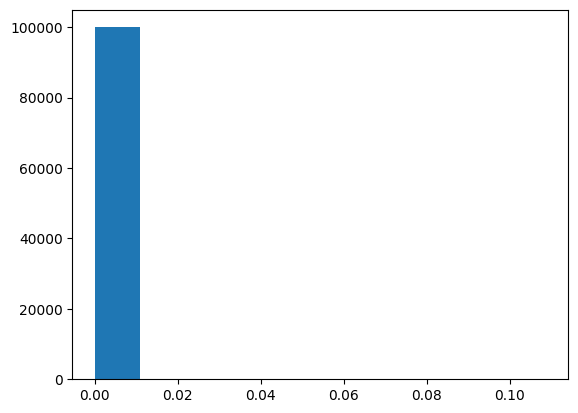

In [49]:
t_list = []
dh = go.DiceHand()
num_sims = 100000

for i in range(num_sims):
    dh.roll()
    dice_count_list = np.array([dh.dice_values().count(n) for n in range(1, 7)])
    t0 = perf_counter()
    # dh.possible_scores()
    ps_set = possible_scores(dice_count_list)
    # [[''.split(ps[:5]), int(ps[5:])] for ps in ps_set]
    t1 = perf_counter()
    t_list.append(t1-t0)
    
mean_t = sum(t_list) / num_sims
max_t = max(t_list)
min_t = min(t_list)

print(f'{num_sims} sims: ')
print(f'{round(mean_t, 8)} sec avg')
print(f'{round(min_t, 8)}, {round(max_t, 8)}, min, max')
plt.hist(t_list)
plt.show()

Way friken faster than with `DiceHand.possible_scores()`

Split apart `ps_set` values

100000 sims: 
8.071e-05 sec avg
5.13e-06, 0.01806954, min, max


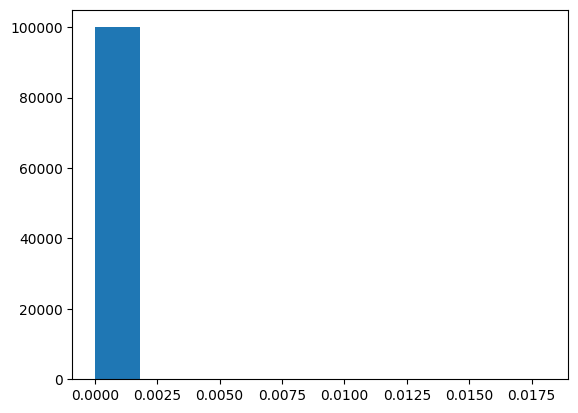

In [50]:
t_list = []
dh = go.DiceHand()
num_sims = 100000

for i in range(num_sims):
    dh.roll()
    dice_count_list = np.array([dh.dice_values().count(n) for n in range(1, 7)])
    t0 = perf_counter()
    # dh.possible_scores()
    ps_set = possible_scores(dice_count_list)
    [[''.split(ps[:5]), int(ps[5:])] for ps in ps_set]
    t1 = perf_counter()
    t_list.append(t1-t0)
    
mean_t = sum(t_list) / num_sims
max_t = max(t_list)
min_t = min(t_list)

print(f'{num_sims} sims: ')
print(f'{round(mean_t, 8)} sec avg')
print(f'{round(min_t, 8)}, {round(max_t, 8)}, min, max')
plt.hist(t_list)
plt.show()

Increases time by a touch but not relative to original `DiceHand` calc

In [44]:
'1234500'[:5]

'12345'

In [39]:
ps = possible_scores(dice_count_list)

In [40]:
ps

{'00001050',
 '100000100',
 '100010150',
 '200000200',
 '200010250',
 '3000001000',
 '300000300',
 '3000101050',
 '300010350'}

In [81]:
[np.array([1,2,3])] + np.array([[1,2,3],[4,5,6]])

array([[2, 4, 6],
       [5, 7, 9]])

In [23]:
'1111'.count('111')

1

In [22]:
'111' in '111'

True

In [24]:
set('111')

{'1'}